In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
chinese = [json.loads(line) for line in open('Chinese_restaurant.json', 'r', encoding = 'UTF-8')]

In [3]:
chinese_reviews = list()  ## The list of all review
business_index = list()  ## The index for business of a review
index = 0

for r in chinese:
    for i in r["Review"]:
        chinese_reviews.append(i)
        business_index.append(index)
    
    index += 1

In [4]:
total_number=len(chinese_reviews)
total_number

261566

**Find the reviews that contain Chinese**

Since the spell checker just can deal with English ...

In [5]:
Review_contain_Chinese_index = list()
Review_contain_Chinese = list()
Review_in_Chinese_index = list()
Review_in_Chinese = list()

for index in range(total_number):
    review = chinese_reviews[index]["text"]
    ## whether the review contains Chinese
    count = 0
    for char in review:
        if '\u4e00' <= char <= '\u9fff' :
            count += 1
            
    if count > 0:
        Review_contain_Chinese_index.append(index)
        Review_contain_Chinese.append(review)
        
    if count/len(review) > 0.4:
        Review_in_Chinese_index.append(index)
        Review_in_Chinese.append(review)

In [6]:
len(Review_contain_Chinese)

1439

In [7]:
len(Review_in_Chinese)

337

In [8]:
Review_in_Chinese

['很久沒去koo koo ,昨晚上和兒子去吃完全傻眼，現在的老板不知道跟以前ㄧ不一樣，但料理完全不行，只要過去早期有去吃過的人會知道，套餐還算豐富，鹽酥雞是招牌，如今的koo koo ,套餐窮酸的可憐，菜不新鮮，昨晚點的是縮小鹽酥雞套餐，發酸的大腸跟麵線，不新鮮的杏鮑菇，發硬的蝦仁做的蝦仁煎，服務人員難爲，頻跟我們道歉，但我是感到ㄕ望，想說之前做的還不錯啊⋯⋯怎麼現在變這樣',
 '一直以来都吃这家在家楼下的面，很干净，小菜牛肉也很推荐。但是！之前有一天带着父母来，一个胖女人一直在跟我们推荐各种小菜，说什么边等边吃。真的弄的我很无语！本来等面就要等很久，还要在我身边一直推销一些不好吃的小菜，简直是强制消费，好好来吃面的，弄的我吃饭的心情都没了。之前看到了别的外国人的评论，说的也是她！我想说 老板你要是看到了这些评论真的不要再让她服务顾客了！很倒胃口！',
 '一直以来都吃这家在家楼下的面，很干净，小菜牛肉也很推荐。但是！之前有一天带着父母来，一个胖女人一直在跟我们推荐各种小菜，说什么边等边吃。真的弄的我很无语！本来等面就要等很久，还要在我身边一直推销一些不好吃的小菜，简直是强制消费，好好来吃面的，弄的我吃饭的心情都没了。之前看到了别的外国人的评论，说的也是她！我想说 老板你要是看到了这些评论真的不要再让她服务顾客了！很倒胃口！',
 '朋友去过， 话不错，长期要排队。后来打电话去问大概等候时间系几耐，竟然唔算非常忙，叫我地直接过去就得。一进店门口就看到隔住玻璃师傅系度忙碌地烧烤紧。店内两边坐位是大台，中间是高凳细台。最有气氛的系水吧前台位上面的大电视，播放住网游游戏过程。菜单上看到选择不少，除了一贯热门的烤串类，还有瓦罐毛肚、主食、凉拌小食、甜点等等。推荐：\n羊肉串、唔太瘦，少少肥相间，没有骚味，加上孜然的香味，一串接一串。\n烤韭菜、韭菜香又不粘牙，脆甜，又唔会烧得太干。\n烤鸡脆骨、烤蘑菇，前者香脆有嚼头，后者juice丰富。\n不推荐烧鲜贝，肉比较细，粉丝多左少少。\n总体其实系几唔错下，气氛好，出品不错。如果冷气再凉d仲正',
 '我們來之前已經致電餐廳訂位了，然後我們到達餐廳之後才發現原來訂了位都還是要等位，那到底訂位的作用是什麼呢？我們當天點了 四和菜 就是四道菜根一大碗湯。湯的味道不錯，沒有味精，而且不鹹湯渣也很足夠。可是我們覺得另外四道菜（龍蝦、

#### Using nltk pacakge for data precessing

- convert to lower case
- tokenize
- spell check
- Lemmatize ("links words with similar meaning to one word")
- Filter the stopwords (including punctation)

Ref: https://medium.com/@pemagrg/pre-processing-text-in-python-ad13ea544dae

In [9]:
import nltk

In [10]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

In [11]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [12]:
import datetime

In [13]:
## To identify whether a word is pure English
## Ref: https://www.iteye.com/blog/hzy3774-2359032

def judge_pure_english(keyword):  
    return all(ord(c) < 128 for c in keyword)

In [14]:
start_time = datetime.datetime.now()

reviews_token = list()
## number_of_deal_review = total_number - len(Review_in_Chinese)
review_length = [0] * total_number  ## record the length for each review

## list of stopwords
### the standard stopwords set contains some words which we think are useful. So we remove this word from the stop_words set. 
stop_words = set(stopwords.words('english'))
for word in {"not","nor","no"}:
    stop_words.remove(word)
    
new_stopwords = {"'ve", '...',"'s","''",'``', "'m"}    

for word in new_stopwords:
    stop_words.add(word)


## import the lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()  
        
for index in range(total_number):
    if index in Review_in_Chinese_index:
        reviews_token.append([None])
        continue
    
    if(index % 1000 == 0):
        print(index)
    
    review = chinese_reviews[index]
    ## To lower case
    text = str.lower(review['text']) 
    
    ## Tokenize
    words = word_tokenize(text) 
    
    ## Remove punctation
    temp = list()
    for w in words:
        if w not in set(punctuation):
            temp.append(w)
    words = temp
    
    ## calculate the length 
    review_length[index] = len(words)
    
     ## Spell Check, just do spell check for pure English review
    if all([judge_pure_english(word) for word in words]) == True:
        for i in range(len(words)):
            word = words[i]
            if len(spell.unknown(word)) > 0:

                ### correction
                word = spell.correction(word)
        
                ### Lemmatize
                words[i] = wordnet_lemmatizer.lemmatize(word)
                
                      
         
    ## Remove Stopwords, and change "n't" to "not"  
    temp = list()    
    for w in words:
        if w == "n't":
            w = "not"
        if w not in stop_words:
            temp.append(w)
    words = temp
    
    
    ## Add the Words to Review
    reviews_token.append(words)
    
    
end_time = datetime.datetime.now()      
 
spend_time = (end_time-start_time).seconds
print("spend time: ", spend_time/60, "minutes")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


Create a Dataframe to store the token_review, and review length.

In [15]:
df_review = pd.DataFrame(chinese_reviews)

In [16]:
df_review.insert(0,"business_index", business_index)
df_review["text_token"] = reviews_token
df_review["text_length"] = review_length

In [17]:
df_review.head()

,business_index,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text_token,text_length
0,0,QXAEGFB4oINsVuTFxEYKFQ,0,2017-01-27 21:54:30,2,6W0MQHmasK0IsaoDo4bmkw,3.0,My girlfriend and I went for dinner at Emerald...,3,2K62MJ4CJ19L8Tp5pRfjfQ,"[girlfriend, went, dinner, emerald, chinese, t...",241
1,0,QXAEGFB4oINsVuTFxEYKFQ,0,2013-06-24 23:11:30,0,BeeBfUxvzD4qNX4HxrgA5g,3.0,We've always been there on a Sunday so we were...,0,A0kENtCCoVT3m7T35zb2Vg,"[always, sunday, hoping, saturday, dim, sum, w...",86
2,0,QXAEGFB4oINsVuTFxEYKFQ,0,2016-01-04 12:59:22,0,A1D2kUnZ0HTroFreAheNSg,3.0,"***No automatic doors, not baby friendly!*** I...",0,SuOLY03LW5ZcnynKhbTydA,"[***no, automatic, doors, not, baby, friendly,...",44
3,0,QXAEGFB4oINsVuTFxEYKFQ,0,2014-05-09 02:38:43,0,2pf45Stf-pNew-xgTababQ,1.0,"Horrible service,\nI went there tonight with m...",1,lymyUak6KNcNKoDbK87MiQ,"[horrible, service, went, tonight, boyfriend, ...",223
4,0,QXAEGFB4oINsVuTFxEYKFQ,2,2011-03-21 14:39:55,1,RHhlmL07evgAdPaXQV8Omg,4.0,One of the gauges of a good Chinese restaurant...,2,6vU0I5XgCv9OQHZ76rV6qw,"[one, gauges, good, chinese, restaurant, numbe...",320


In [18]:
df_review.to_csv("Chinese_review.csv")

In [19]:
f = open('Review_in_Chinese_index.txt', 'w')
for index in Review_in_Chinese_index:
    f.write(str(index))
    f.write(' ')
f.close()

In [20]:
f = open('Review_contain_Chinese_index.txt', 'w')
for index in Review_contain_Chinese_index:
    f.write(str(index))
    f.write(' ')
f.close()

Create the Dataframe that record the Review written in Chinese

In [21]:
df_Review_in_Chinese = pd.DataFrame()
df_Review_in_Chinese["index"] = Review_in_Chinese_index
df_Review_in_Chinese["text"] = Review_in_Chinese

Create the Dataframe that record the Review contains Chinese

In [22]:
df_Review_contain_Chinese = pd.DataFrame()
df_Review_contain_Chinese["index"] = Review_contain_Chinese_index
df_Review_contain_Chinese["text"] = Review_contain_Chinese

In [23]:
### Write two dataframe to csv
df_Review_contain_Chinese.to_csv("Review_contain_Chinese.csv")
df_Review_in_Chinese.to_csv("Review_in_Chinese.csv")

In [24]:
df_Review_in_Chinese.head()

,index,text
0,2482,"很久沒去koo koo ,昨晚上和兒子去吃完全傻眼，現在的老板不知道跟以前ㄧ不一樣，但料理完..."
1,3040,一直以来都吃这家在家楼下的面，很干净，小菜牛肉也很推荐。但是！之前有一天带着父母来，一个胖女...
2,3278,一直以来都吃这家在家楼下的面，很干净，小菜牛肉也很推荐。但是！之前有一天带着父母来，一个胖女...
3,7432,朋友去过， 话不错，长期要排队。后来打电话去问大概等候时间系几耐，竟然唔算非常忙，叫我地直接...
4,8152,我們來之前已經致電餐廳訂位了，然後我們到達餐廳之後才發現原來訂了位都還是要等位，那到底訂位的...


**Number of review relate to rating:**

In [25]:
df_CHN_restaurant = pd.read_json("Chinese_restaurant.json", lines=True)

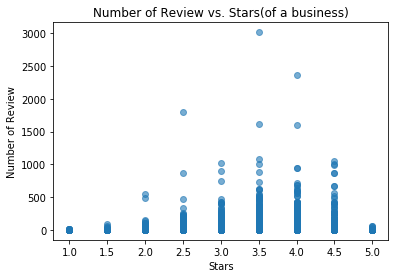

In [26]:
x = df_CHN_restaurant["stars"]
y = df_CHN_restaurant["review_count"]
plt.scatter(x, y, alpha=0.6) 
plt.xlabel("Stars")
plt.ylabel("Number of Review")
plt.title("Number of Review vs. Stars(of a business)")
plt.show()

**Review Length relateing to rating**

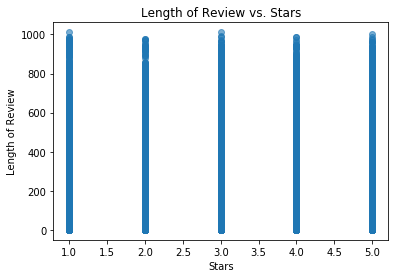

In [27]:
x = df_review["stars"]
y = df_review["text_length"]
plt.scatter(x, y, alpha=0.6) 
plt.xlabel("Stars")
plt.ylabel("Length of Review")
plt.title("Length of Review vs. Stars")
plt.show()

**Word frequency**

In [28]:
from nltk import FreqDist

In [29]:
reviews_token_flatten = [word for sublist in reviews_token for word in sublist]
freq_all = FreqDist(reviews_token_flatten)

In [30]:
## Ref: https://blog.csdn.net/m0_38126215/article/details/83582697

f = zip(freq_all.keys(),freq_all.values())  # dictionary to list
sort_f = list(sorted(f,key=lambda s: s[1], reverse=True))  # sort by number of frequency

In [31]:
## Top 100 words for all reviews

for i in range(100):  
    print(sort_f[i])

('not', 390756)
('food', 263804)
('good', 176039)
('place', 159718)
('chicken', 111335)
('like', 104497)
('service', 104436)
('chinese', 100551)
('great', 91294)
('restaurant', 84424)
('one', 80400)
('time', 79075)
('rice', 78947)
('would', 78512)
('get', 76428)
('really', 72860)
('order', 72827)
('ordered', 71534)
('go', 68862)
('back', 68746)
('soup', 66968)
('fried', 62867)
('also', 61410)
('beef', 55837)
('noodles', 55321)
('no', 55182)
('menu', 51243)
('sauce', 50767)
('us', 50141)
('dishes', 48769)
('came', 48745)
('got', 48477)
('pork', 47198)
('try', 47111)
('best', 46597)
('even', 45393)
('always', 45391)
('come', 43238)
('pretty', 42483)
('nice', 42426)
('well', 42218)
('lunch', 41330)
('dish', 41142)
('hot', 40809)
('delicious', 40234)
('definitely', 39087)
('little', 39076)
('much', 39031)
('eat', 38563)
('shrimp', 37741)
('love', 37309)
('could', 36862)
('first', 36308)
('better', 36075)
('spicy', 35936)
('never', 34968)
('fresh', 34922)
('noodle', 34643)
('people', 33494)

Word frequency for each rating

In [45]:
freq_list = list()

for rating in [1.0,2.0,3.0,4.0,5.0]:
    df_review_rating = df_review.loc[df_review['stars'] == rating]
    review_rating = df_review_rating["text_token"].values.tolist()
    reviews_rating_flatten = [word for sublist in review_rating for word in sublist]
    freq_rating = FreqDist(reviews_rating_flatten)

    rating = zip(freq_rating.keys(),freq_rating.values())  # dictionary to list
    sort_ = list(sorted(rating,key=lambda s: s[1], reverse=True))  # sort by number of frequency

    freq_list.append(sort_)

In [49]:
## top 20 words for each rating
for i in range(5):
    print(freq_list[i][0:20])

[('not', 80597), ('food', 44042), ('place', 21718), ('no', 17399), ('like', 17109), ('service', 16599), ('order', 16274), ('chicken', 15521), ('would', 14821), ('one', 14372), ('us', 14086), ('ordered', 13959), ('back', 13760), ('time', 13753), ('restaurant', 13129), ('good', 12738), ('even', 12530), ('never', 12075), ('get', 12049), ('go', 11636)]
[('not', 64208), ('food', 32006), ('good', 16911), ('place', 16256), ('like', 14399), ('chicken', 13432), ('service', 12301), ('would', 10801), ('ordered', 10782), ('one', 10227), ('rice', 9787), ('no', 9708), ('chinese', 9593), ('time', 9494), ('restaurant', 9247), ('order', 9209), ('get', 8975), ('back', 8614), ('really', 8611), ('go', 7571)]
[('not', 83632), ('food', 43815), ('good', 38327), ('place', 26403), ('like', 21565), ('chicken', 19524), ('service', 18162), ('would', 17652), ('chinese', 17599), ('rice', 15990), ('restaurant', 14964), ('really', 14963), ('get', 14532), ('one', 14404), ('ordered', 13797), ('time', 13470), ('soup', 1